In [37]:
import pandas as pd

df = pd.read_csv('csv/car_prices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## Visualizing Data to Identify Suitable Regression Model
Before applying linear regression, it's important to visualize the relationships between features and the target variable. This helps to determine if a linear model is appropriate or if another model might be better. Pairwise plots are useful for this purpose.

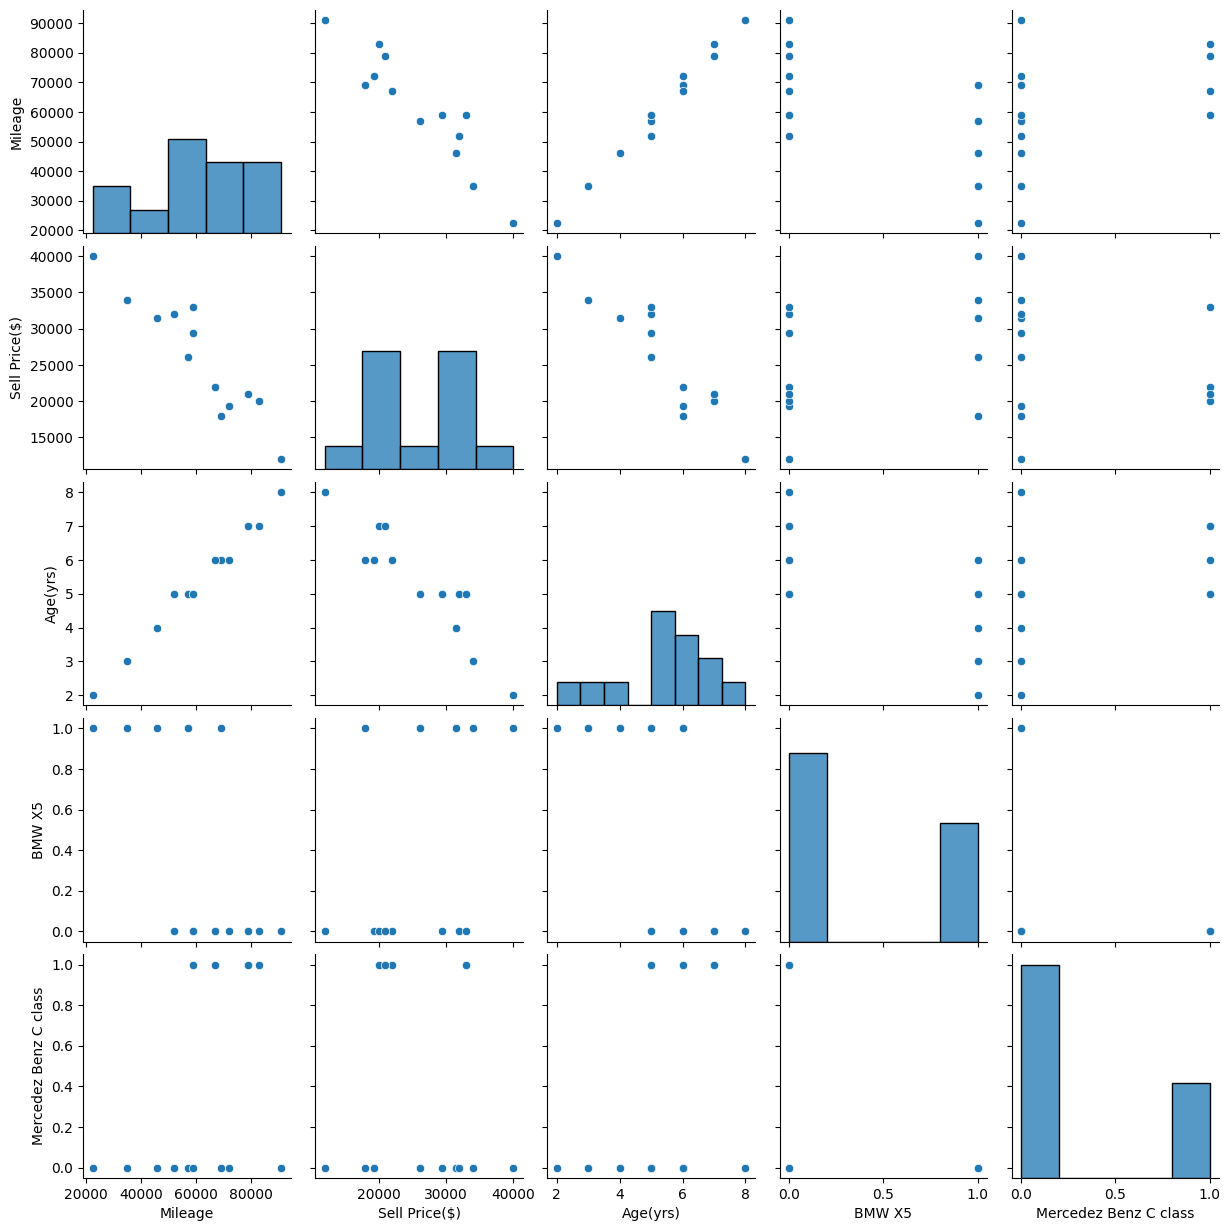

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships to visualize feature-target relationships
sns.pairplot(df)
plt.show()

In [42]:
dummies = pd.get_dummies(df['Car Model'], drop_first=True)
dummies

,BMW X5,Mercedez Benz C class
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


In [44]:
df = pd.concat([df, dummies], axis='columns')
df

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,True,False
1,BMW X5,35000,34000,3,True,False
2,BMW X5,57000,26100,5,True,False
3,BMW X5,22500,40000,2,True,False
4,BMW X5,46000,31500,4,True,False
5,Audi A5,59000,29400,5,False,False
6,Audi A5,52000,32000,5,False,False
7,Audi A5,72000,19300,6,False,False
8,Audi A5,91000,12000,8,False,False
9,Mercedez Benz C class,67000,22000,6,False,True


In [45]:
df = df.drop('Car Model', axis='columns')
df

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
X = df.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [51]:
Y = df['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [52]:
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
model.score(X, Y)

0.9417050937281082

In [ ]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
    
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

In [55]:
model.predict([[45000, 4, 0, 1]])

d:\Work\On\ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [56]:
model.predict([[86000, 7, 1, 0]])

d:\Work\On\ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])